## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [236]:
#To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [238]:
bc = pd.read_csv("bigcity-1.csv")

In [239]:
bc.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [240]:
bc.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

Dropping 'Unnamed: 0' column

In [241]:
bc1 = bc.drop("Unnamed: 0",axis=1)

In [242]:
bc1.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


Finding missing values

In [243]:
bc1.isna().sum()

u    0
x    0
dtype: int64

NO Missing values

Printing correlation matrix

In [244]:
bc1.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [245]:
bc1.dtypes

u    int64
x    int64
dtype: object

Getting the size og the dataframe

In [246]:
bc1.shape

(49, 2)

In [247]:
X = bc1.drop(labels = 'x',axis=1)

In [248]:
X.shape

(49, 1)

In [249]:
y = bc1.drop(labels = 'u',axis=1)

In [250]:
y.shape

(49, 1)

In [251]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Printing the shape of X_train and y_train

In [252]:
X_train.shape

(39, 1)

In [253]:
y_train.shape

(39, 1)

In [254]:
y_train.head()

,x
31,46
38,113
21,57
35,183
19,459


Printing the shape of X_test and y_test

In [255]:
X_test.shape

(10, 1)

In [256]:
y_test.shape

(10, 1)

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [257]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    m = regression_model.intercept_[0]
    c = regression_model.coef_[0][idx]
    print("The coefficient for {} is {}".format(col_name, c))
    print("The intercept is {}".format(m))

The coefficient for u is 1.1594512342174779
The intercept is 9.718455322828262


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

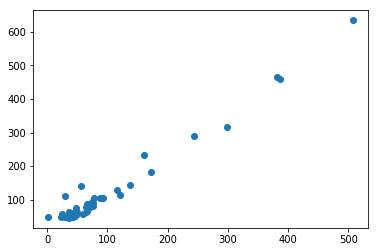

In [259]:
plt.scatter(X_train,y_train)

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [260]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [261]:
# predict y 
y_pred = regression_model.predict(X_test)

In [262]:
mse = mean_squared_error(y_test,y_pred)
mse

546.869224903266

In [263]:
# underroot of mean_sq_error is RMSE

import math

RMSE = math.sqrt(mse)
RMSE

23.385235190249123

Root mean square error is 23.38

In [264]:
Rsqr = r2_score(y_test,y_pred)
Rsqr

0.9181922560396981

R^2 value is 0.918

## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [265]:
#Calculating the score for train data
regression_model.score(X_train, y_train)

0.9682175540860046

In [266]:
#Calculating the score for test data
regression_model.score(X_test, y_test)

0.9181922560396981

this means that 8.2% of the errors are residuals

# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [267]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics


## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [268]:
df_pima = pd.read_csv("pima-indian-diabetes.csv")

In [269]:
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [270]:
df_pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [271]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [272]:
df_pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [273]:
df_pima.shape

(768, 9)

In [274]:
#df_pima[df_pima["Glucose"]==0]

In [275]:
#Finding the columns with value 0
df_pima.isin(["0"]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                       500
dtype: int64

In [276]:
# df_pima=df_pima.replace({'plas': {0: plas_med}})    # replace the 0 plasma values in the original data with the median of plasma
# print (data)

In [277]:
# df_pima[df_pima["Glucose"]==0] = df_pima["Glucose"].median()

In [278]:
collist = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [279]:
for i in collist:
    df_pima=df_pima.replace({i: {0: df_pima[i].median()}})

In [280]:
df_pima.isin(["0"]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Class                       500
dtype: int64

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

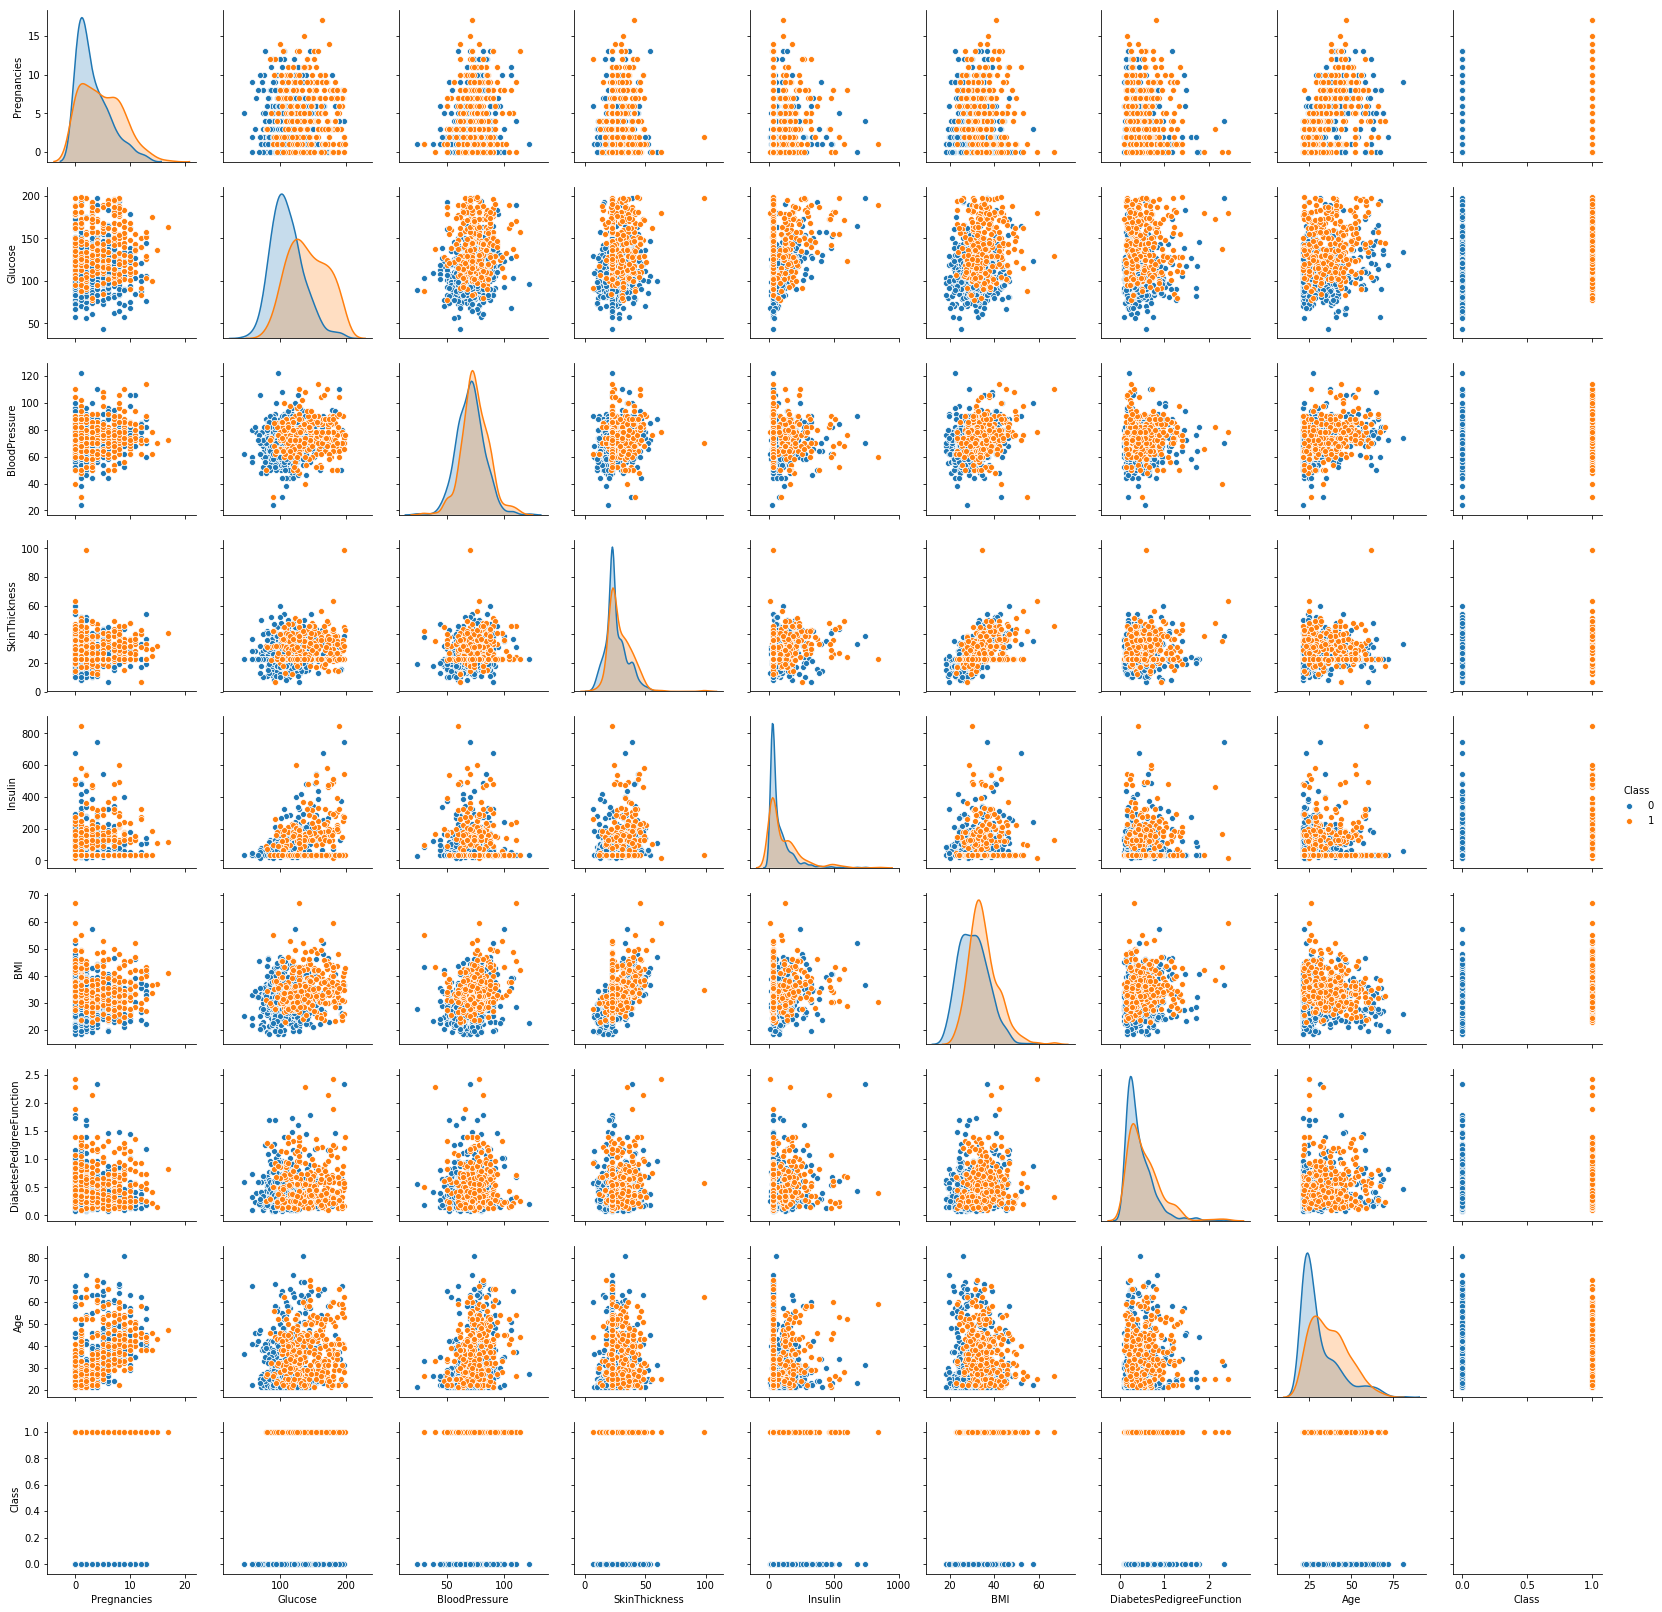

In [281]:
sns.pairplot(df_pima,diag_kind='kde',hue='Class')

'Glucose','BMI' and 'Age' are 2 columns which seem to be affecting the result if the person is diabetic

In [282]:
#Determining the correlation of all the columns with 'Class'
df_pima.corr().iloc[:,8:9]

,Class
Pregnancies,0.221898
Glucose,0.492782
BloodPressure,0.165723
SkinThickness,0.189065
Insulin,0.148457
BMI,0.312249
DiabetesPedigreeFunction,0.173844
Age,0.238356
Class,1.000000


## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [283]:
df_pima['Class'] = df_pima.Class.astype('category')

In [284]:
df_pima.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Class                       category
dtype: object

In [285]:
X = df_pima.drop(labels = 'Class',axis=1)

In [286]:
y = df_pima["Class"]

In [287]:
X.shape

(768, 8)

In [288]:
y.shape

(768,)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [290]:
X_train.shape

(537, 8)

In [291]:
y_train.shape

(537,)

In [292]:
df_pima.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Class                       category
dtype: object

In [293]:
from sklearn.tree import DecisionTreeClassifier
#Overfit model - until pure leaf
model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [294]:
ypred=model.predict(X_test)

In [295]:
acc=metrics.accuracy_score(y_test,ypred)
print(acc)

0.7662337662337663


In [296]:
#Confusion matrix
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)

[[123  23]
 [ 31  54]]


Print the feature importance of the decision model - Optional

In [297]:
feature_imp = model.feature_importances_

df_pima_attr = df_pima.iloc[:,0:8]
feat_names = df_pima_attr.columns[0:8]
print(feat_names)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [298]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)

In [299]:
Rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [300]:
y_predict_Rf=Rf_model.predict(X_test)

In [301]:
Rf_acc=metrics.accuracy_score(y_test,y_predict_Rf)
print(Rf_acc)

0.7662337662337663


Accuracy with random forest comes out to 76.6% with depth of 3

## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [302]:
values=df_pima.values

In [303]:
values

array([[6, 148.0, 72.0, ..., 0.627, 50, 1],
       [1, 85.0, 66.0, ..., 0.35100000000000003, 31, 0],
       [8, 183.0, 64.0, ..., 0.672, 32, 1],
       ...,
       [5, 121.0, 72.0, ..., 0.245, 30, 0],
       [1, 126.0, 60.0, ..., 0.349, 47, 1],
       [1, 93.0, 70.0, ..., 0.315, 23, 0]], dtype=object)

In [304]:

from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(base_estimator=Rf_model,n_estimators= 51)

abcl.fit(X_train, y_train)
#abcl.score(test_set , test_labels)# use this if you have reserved any dataset for testing



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [305]:
y_pred_boost = abcl.predict(X_test)
y_pred_boost

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [306]:
#Accuracy
metrics.accuracy_score(y_test,y_pred_boost)

0.7792207792207793

## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [307]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=Rf_model,n_estimators=51,oob_score=True)
bgcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [308]:
bgcl.oob_score_

0.7411545623836127

In [309]:
y_pred_bag = bgcl.predict(X_test)
y_pred_bag

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [310]:
#Accuracy
acc_bag=metrics.accuracy_score(y_test,y_pred_bag)
acc_bag

0.7792207792207793

## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [311]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [312]:
y_pred_gb=gbcl.predict(X_test)
metrics.accuracy_score(y_test,y_pred_gb)

0.8008658008658008

Accuracy of 80% with Gradient boost

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [313]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [314]:
enclf = VotingClassifier(estimators = [('dt',model), ('rf', Rf_model), ('bg', bgcl)], voting = 'hard')

In [315]:
for clf, label in zip([Rf_model, bgcl, model], ['RandomForest', 'Bagging', 'DecisionTree']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.75 (+/- 0.013) [RandomForest]
Accuracy: 0.76 (+/- 0.017) [Bagging]
Accuracy: 0.73 (+/- 0.012) [DecisionTree]
